In [1]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

In [2]:
params = {
    "readout_lo_frequency": 7.2e9,
    "drive_lo_frequency": 5e9,
    "ext_lo": 11e9
}

2025-06-10 07:47:05,716 - INFO - Successfully connected to zi


[2025.06.10 07:47:05.722] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.10 07:47:05.733] INFO    VERSION: laboneq 2.51.0
[2025.06.10 07:47:05.734] INFO    Connecting to data server at localhost:8004
[2025.06.10 07:47:05.737] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.06.10 07:47:05.742] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.06.10 07:47:05.749] INFO    Configuring the device setup
[2025.06.10 07:47:05.759] INFO    The device setup is configured


2025-06-10 07:47:05,775 - INFO - Turning on local oscillators before experiment


[2025.06.10 07:47:05.799] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.06.10 07:47:05.801] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.06.10 07:47:05.802] INFO    Starting LabOne Q Compiler run...
[2025.06.10 07:47:05.829] INFO    Schedule completed. [0.025 s]
[2025.06.10 07:47:05.876] INFO    Code generation completed for all AWGs. [0.046 s]
[2025.06.10 07:47:05.877] INFO    Completed compilation step 1 of 1. [0.074 s]
[2025.06.10 07:47:05.879] INFO     ─────────────────────────────────────────────────────────────────────── 
[2025.06.10 07:47:05.880] INFO      Device              AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.06.10 07:47:05.882] INFO     ─────────────────────────────────────────────────────────────────────── 
[2025.06.10 07:47:05.882] INFO      SHFQC_dev12183        0         21            0           1      8000  
[2025.06.10 07:47:05.8

2025-06-10 07:47:06,565 - INFO - Turning off local oscillators after experiment


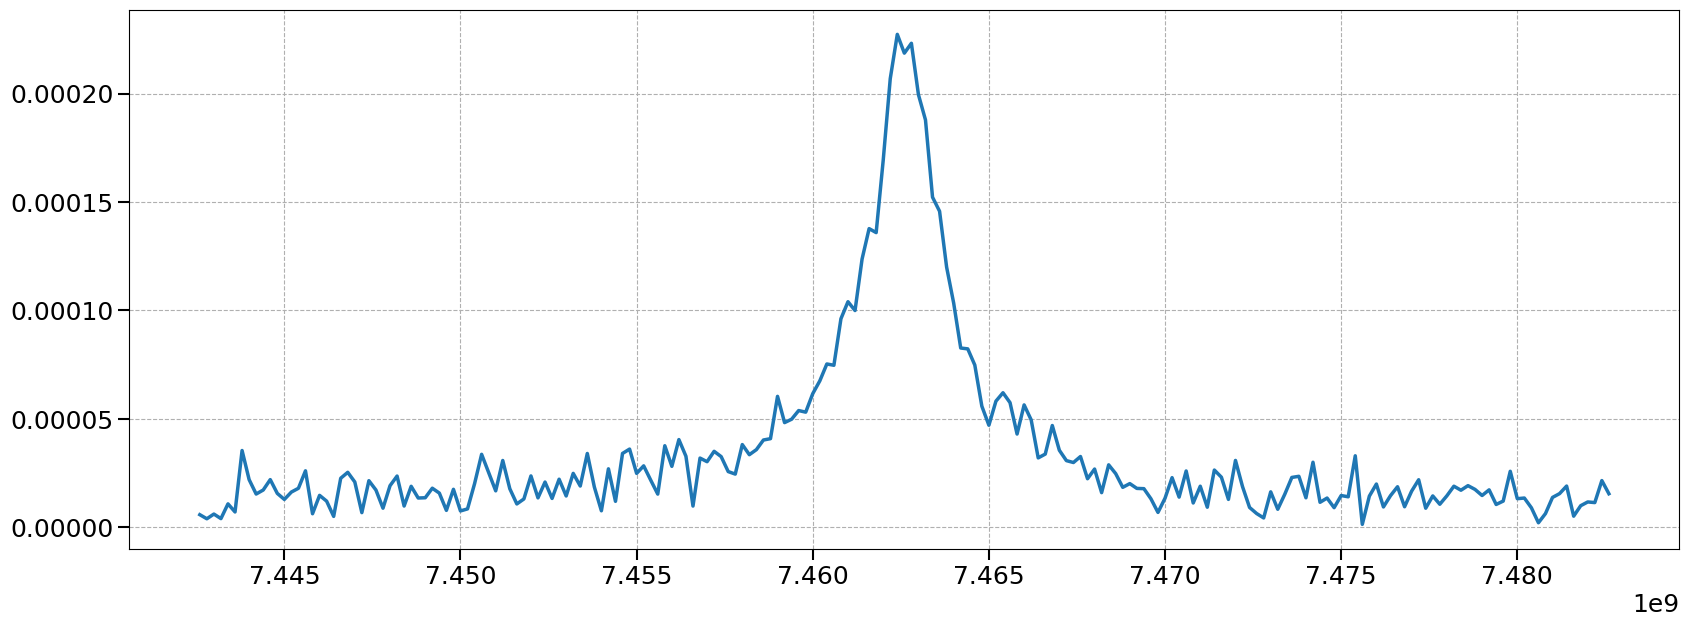

In [2]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

ro_freq = 7.4626e9

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 200

result = rr_spec.run(
    np.linspace(ro_freq - 20e6, ro_freq + 20e6, 201),
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"ro_power": np.linspace(-40, 0, 11)},
    options=options
)

In [ ]:
import numpy as np
from time_rabi import TimeRabi, TimeRabiOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode
%matplotlib inline

time_rabi = TimeRabi()
options = TimeRabiOptions()
options.count = 2**9
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = time_rabi.run(
    np.linspace(1e-10,600e-9, 53),
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"ro_power": np.linspace(-40, 0, 11)},
    options=options,
)

2025-06-10 09:51:06,471 - INFO - Successfully connected to zi


[2025.06.10 09:51:06.477] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.10 09:51:06.480] INFO    VERSION: laboneq 2.51.0
[2025.06.10 09:51:06.482] INFO    Connecting to data server at localhost:8004
[2025.06.10 09:51:06.485] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.06.10 09:51:06.493] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.06.10 09:51:06.498] INFO    Configuring the device setup
[2025.06.10 09:51:06.506] INFO    The device setup is configured


2025-06-10 09:51:06,509 - INFO - Turning on local oscillators before experiment


AcquisitionType.SPECTROSCOPY_IQ
AcquisitionType.SPECTROSCOPY_IQ
[2025.06.10 09:51:06.527] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.06.10 09:51:06.528] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.06.10 09:51:06.529] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.06.10 09:51:06.530] INFO    Starting LabOne Q Compiler run...
[2025.06.10 09:51:06.541] INFO    Schedule completed. [0.009 s]
[2025.06.10 09:51:06.563] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.06.10 09:51:06.564] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.06.10 09:51:06.565] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or 

average relative std: 0.45369850227250913
average std: 9.460869266857227e-05
std of the std: 1.3977359178516824e-05
relative std over std avg: 0.14773863568204568


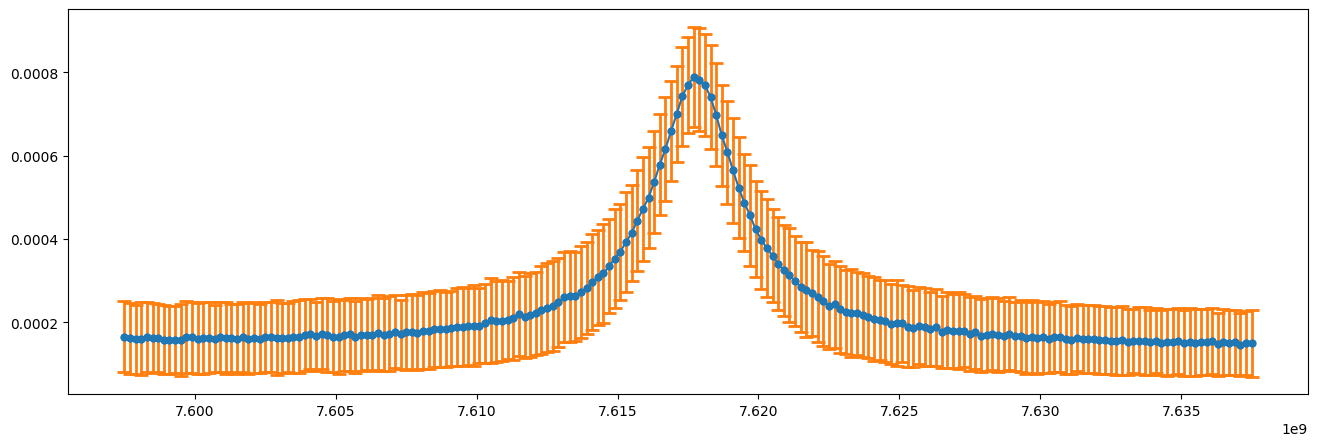

In [63]:
import sqil_core as sqil
import matplotlib.pyplot as plt

# count = 2600
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00163-rr_spectroscopy_2025-05-14T012721"
# count = 1048
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00158-rr_spectroscopy_2025-05-14T012004"
# count = 200
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00165-rr_spectroscopy_2025-05-14T014453"
# count = 100
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00164-rr_spectroscopy_2025-05-14T012812"
# count = 2
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00159-rr_spectroscopy_2025-05-14T012109"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)
linmag = np.abs(data[0])
print(
    "average relative std:", np.mean(np.std(linmag, axis=0) / np.mean(linmag, axis=0))
)
print("average std:", np.mean(np.std(linmag, axis=0)))
print("std of the std:", np.std(np.std(linmag, axis=0)))
print(
    "relative std over std avg:",
    np.mean(np.std(np.std(linmag, axis=0)) / np.mean(np.std(linmag, axis=0))),
)

plt.figure(figsize=(16, 5))
plt.errorbar(
    freq[0],
    np.mean(linmag, axis=0),
    np.std(linmag, axis=0),
    fmt="-o",
    color="tab:blue",
    label="Mean with Error",
    ecolor="tab:orange",
    capsize=5,
    capthick=2,
    elinewidth=2,
    markersize=5,
)
plt.show()

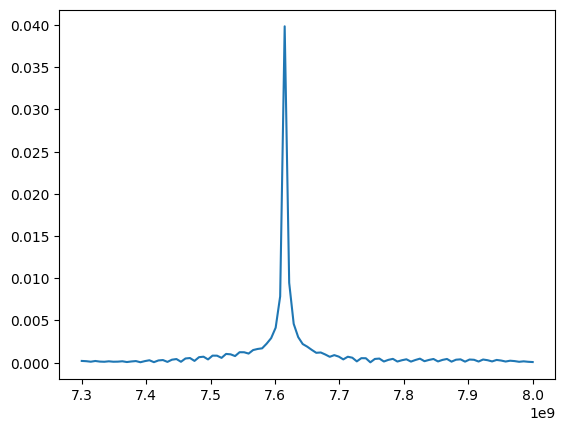

In [4]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-12\00011-rr spectroscopy_2025-05-12T231453"

data, freq = sqil.extract_h5_data(path, ["data", "frequencies"])

plt.plot(freq, np.abs(data))
plt.show()

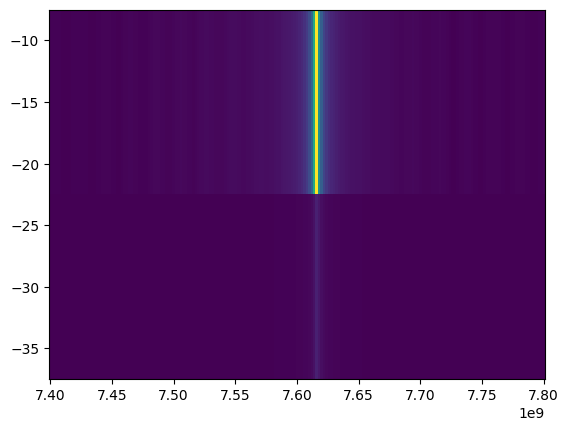

In [5]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-13\00029-rr spectroscopy_2025-05-13T005313"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

# for d, f, s in zip(data, freq, sweep):
#     plt.plot(f, np.abs(d), label=s)
# plt.legend()

plt.pcolormesh(freq[0], sweep, np.abs(data))

(201,) (2,) (2, 201)


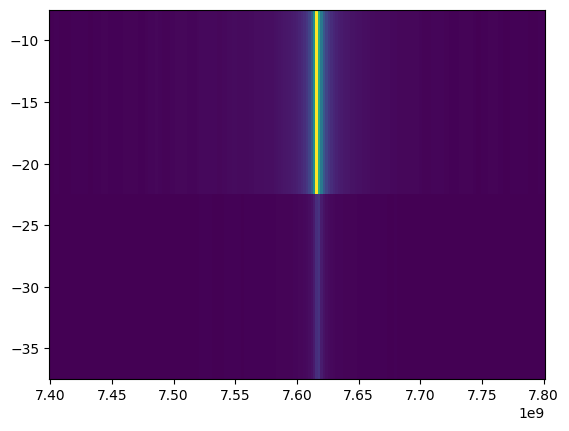

In [6]:
path = r"Z:\Projects\BottomLoader\data\20250430_Transmon_20250207_multi_Fl_NbAl_N45\2025-05-13\00429-pulsed_onetone_vs_ro_power_2025-05-13T003736"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "ro_freq", "sweep_param"])
plt.pcolormesh(freq[0], sweep, np.abs(data))

print(freq[0].shape, sweep.shape, data.shape)

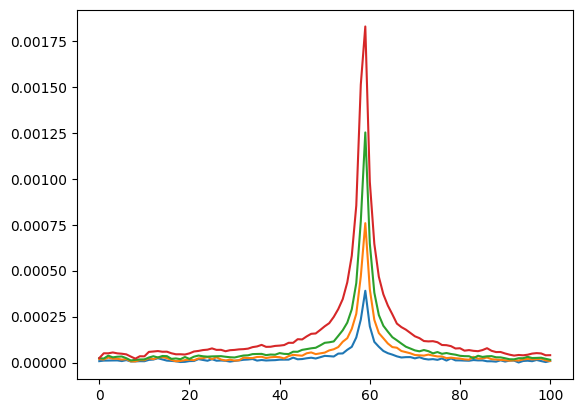

In [7]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-13\00126-rr spectroscopy_2025-05-13T222549"

data, freq, sweep0, sweep1 = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0", "sweep1"])

data.shape, freq.shape, sweep0.shape, sweep1.shape

plt.plot(np.abs(data).T)